In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from numpy import pi, sin,cos, arctan2, sqrt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kmeans2 import KMeansAlgorithm

In [2]:
flname="../dataset_cluster_warehouse_exp_1.csv"
df = pd.read_csv(flname)
df

,province_name,city_name,district_name,lat_long,avg_demand_baseline,demand_target,njop_2021_min,njop_2021_max
0,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,"-6.1548792,106.7204645",153,230,2300.0,14000.0
1,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,"-6.1639643,106.7506821",387,581,3700.0,35000.0
2,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,"-6.1461655,106.8106198",114,171,7400.0,35400.0
3,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,"-6.146188,106.8079118",36,54,4700.0,35800.0
4,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,"-6.1915513,106.7481174",771,1157,7000.0,20700.0
...,...,...,...,...,...,...,...,...
63,JAWA BARAT,KOTA DEPOK,BEJI,"-6.3723053,106.7830725",378,832,NaN,NaN
64,JAWA BARAT,KOTA DEPOK,CIMANGGIS,"-6.3723053,106.7830725",231,508,NaN,NaN
65,JAWA BARAT,KOTA DEPOK,CINERE,"-6.3324008,106.7732734",495,1089,NaN,NaN
66,JAWA BARAT,KOTA DEPOK,LIMO,"-6.3663032,106.7621014",264,581,NaN,NaN


In [3]:
# add distancce in dataframe from current loc

data_lat = []
data_long = []
for idx, row in df.iterrows():
    point = row['lat_long'].split(',')
    lat = float(point[0])
    long = float(point[1])
    data_lat.append(lat)
    data_long.append(long)

df = df.assign(lat=data_lat, long=data_long)
dataset = df[['city_name', 'district_name', 'avg_demand_baseline', 'demand_target', 'lat', 'long']]
dataset

,city_name,district_name,avg_demand_baseline,demand_target,lat,long
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,153,230,-6.154879,106.720465
1,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,387,581,-6.163964,106.750682
2,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,114,171,-6.146166,106.810620
3,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,36,54,-6.146188,106.807912
4,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,771,1157,-6.191551,106.748117
...,...,...,...,...,...,...
63,KOTA DEPOK,BEJI,378,832,-6.372305,106.783073
64,KOTA DEPOK,CIMANGGIS,231,508,-6.372305,106.783073
65,KOTA DEPOK,CINERE,495,1089,-6.332401,106.773273
66,KOTA DEPOK,LIMO,264,581,-6.366303,106.762101


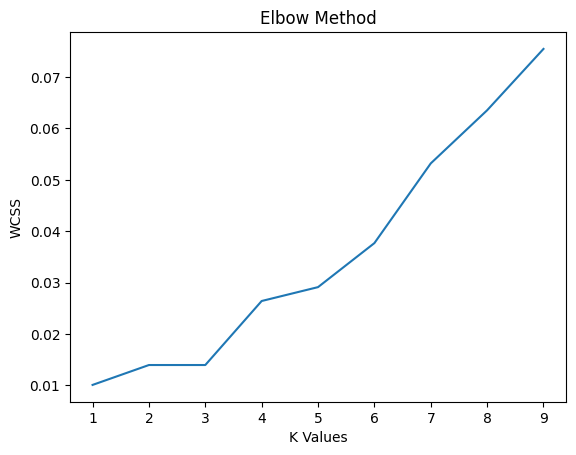

In [4]:
train_dataset = dataset[['lat', 'long']]
crange = 10
kmeans = KMeansAlgorithm(train_dataset, crange)
kmeans.fit_model(300)
kmeans.plot_elbow()

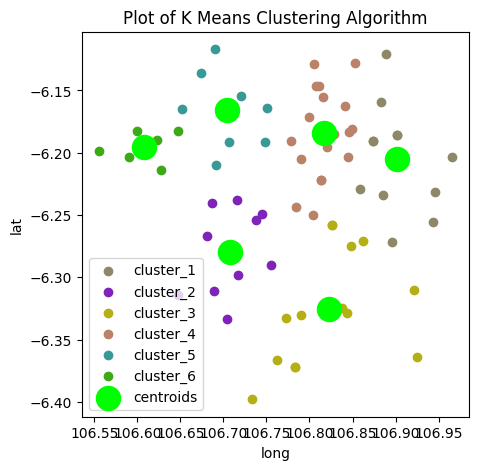

In [6]:
km = KMeansAlgorithm(train_dataset, 6)
km.fit_model(200)
km.plot_kmeans()

In [7]:
km.centroids

array([[ -6.20488072,  -6.27952132,  -6.32580671,  -6.1844831 ,
         -6.16611786,  -6.1952137 ],
       [106.90128614, 106.70809684, 106.82257311, 106.81694994,
        106.70420542, 106.60758553]])

In [8]:
y_km = km.predict()
#assign y pred to dataset
pred_result = [0 for i in range(dataset.shape[0])]
for prediction in y_km[0].keys():
    for d in y_km[0][prediction]:
        idx = dataset[(dataset["lat"]==d[0]) & (dataset["long"]==d[1])].index.tolist()
        for id in idx:
            pred_result[id] = prediction
dataset = dataset.assign(pred=pred_result)
dataset.sort_values("pred")

,city_name,district_name,avg_demand_baseline,demand_target,lat,long,pred
19,KOTA ADMINISTRASI JAKARTA TIMUR,CIPAYUNG,69,124,-6.185466,106.901093,1
21,KOTA ADMINISTRASI JAKARTA TIMUR,DUREN SAWIT,402,724,-6.234022,106.885350,1
27,KOTA ADMINISTRASI JAKARTA TIMUR,PULOGADUNG,102,184,-6.190791,106.874119,1
18,KOTA ADMINISTRASI JAKARTA TIMUR,CAKUNG,366,659,-6.185466,106.901093,1
62,KOTA BEKASI,PONDOK GEDE,306,551,-6.271745,106.895805,1
...,...,...,...,...,...,...,...
45,KOTA TANGERANG,CIPONDOH,165,363,-6.182966,106.647707,6
46,KOTA TANGERANG,JATIUWUNG,102,224,-6.198745,106.556088,6
48,KOTA TANGERANG,KARAWACI,417,917,-6.182870,106.600069,6
50,KOTA TANGERANG,PINANG,198,436,-6.213557,106.627212,6
